# Simple Classifiers - looking at decision boundaries

- Linear regression can be used for binary classification. 
- k Nearest Neighbor is a very flexible approach.
- How do we approximate the hidden functions?


In [14]:
import numpy as np
from numpy import concatenate
import matplotlib.pyplot as plt
import pandas as pd
# colors is useful for mapping colors to numbers
from matplotlib import colors


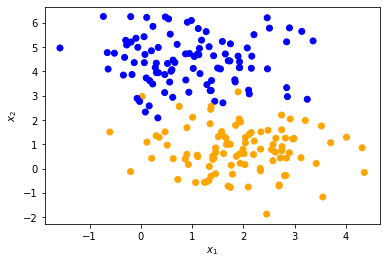

In [15]:
# similar effect using make_blobs from sklearn
# but in this case we cannot control the shape of the blobs using covariance matricesbb

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                  random_state=0)

# using color maps
cmap = colors.ListedColormap(['blue','orange'])

ax=plt.axes()
ax.scatter(X[:,0],X[:,1],color=cmap(y))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

We can use any of the two datasets

## Obtaining a linear boundary from linear regression

The linear model applied obtained with this data is a plane with equation $y=a_0+a_1 x_1+a_2 x_2$.

The boundary will be defined by $y=0.5$. To draw the line of $x_2$ as a linear function of $x_1$ (the boundary line) we solve the equation:

$$
a_0+a_1 x_1+a_2 x_2 = 0.5 \equiv x_2=\frac{0.5-a_0}{a_2}-\frac{a_1}{a_2}x_1
$$

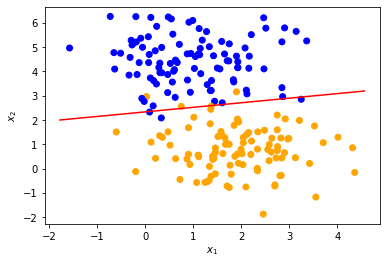

In [16]:
# learn a classifier using linear regression

from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X,y)
# find boundary
a0=model.intercept_
a1=model.coef_[0]
a2=model.coef_[1]

a0bound=(.5-a0)/a2
a1bound=-a1/a2

xbound=np.array([min(X[:,0])-.2,max(X[:,0])+.2])
ybound=np.array(a0bound+xbound*a1bound)

plt.axes()
plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(xbound,ybound,color='red');

## A good linear boundary

The linear classifier obtained with regression minimizes the RSS of the regression problem. We are adapting the regression problem in an ***ad-hoc* way** to the classification problem. However, **this is not an ideal solution**. We should minimize the classification error.

The logistic regression approach finds the parameters that maximize the probability of the true classes (maximum likelihood - to see in future classes).

Logistic regression is **more robust** than the ad-hoc classifier obtained from linear regression with the 0.5 threshold.


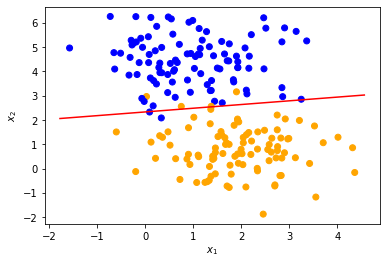

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(X, y)

# Retrieve the model parameters.
b = model.intercept_[0]
w1, w2 = model.coef_.T

# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# prepare the points for drawing the linear boundary
xmin, xmax = min(X[:,0])-.2, max(X[:,0])+.2
ymin, ymax = min(X[:,1])-.2, max(X[:,1])+.2
xbound = np.array([xmin, xmax])
ybound = m*xbound + c

# replot, but now with the boundary
plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(xbound,ybound,color='red');

## The nearest neighbor classifier

The nearest neighbor classifier, also known as $k$-nn is not limited to a specific shape of boundaries. 

We can see the shape of the boundary using different values for $k$.

We plot the boundary for logistic regression for comaprison.

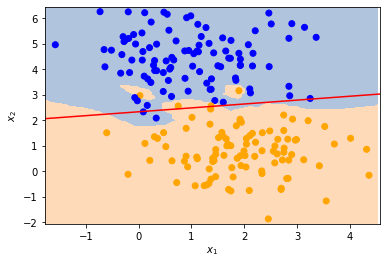

In [18]:
from sklearn.neighbors import KNeighborsClassifier as kNN

model=kNN(n_neighbors=1).fit(X,y)

def plot_classifier_boundary(model,X,y,h = .05):
    # this function can be used with any sklearn classifier
    # ready for two classes but can be easily extended
    cmap_light = colors.ListedColormap(['lightsteelblue', 'peachpuff'])
    x_min, x_max = X[:, 0].min()-.2, X[:, 0].max()+.2
    y_min, y_max = X[:, 1].min()-.2, X[:, 1].max()+.2
    # generate a grid with step h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # the method ravel flattens xx and yy
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.xlim((x_min,x_max))
    plt.ylim((y_min,y_max))


plot_classifier_boundary(model,X,y)

plt.scatter(X[:,0],X[:,1],color=cmap(y))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(xbound,ybound,color='red');

## Extra code

This is an example of how to generate artificial datasets from scratch.

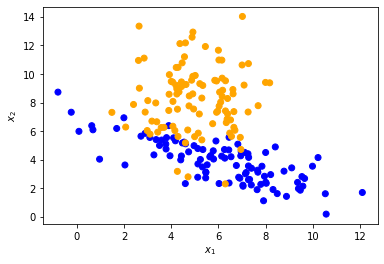

In [21]:
# building the random dataset from numpy
size = 100
covblue = np.matrix([[5,-2],[-2,2]])
covorange = np.matrix([[3,-.5],[-.5,5]])
mean_blue = np.array([6, 4])
mean_orange = np.array([5, 8])
blue = np.random.multivariate_normal(mean=mean_blue,cov=covblue,size=size)
orange = np.random.multivariate_normal(size = size, mean=mean_orange, cov=covorange)
data = pd.DataFrame({
    'x1': concatenate((blue[:,0],orange[:,0])),
    'x2': concatenate((blue[:,1],orange[:,1])),
    'y': [0]*size + [1]*size
})

# a crude way of setting colors - using color maps is more powerful
clrs = ['blue','orange']
classcolors = list(map(lambda x: clrs[x],data.y))

#ax=plt.axes()
plt.scatter(data.x1,data.x2,color=classcolors)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

## kNN regression

How to approximate a numerical function using the k Nearest Neighbors approach. The league example is used.

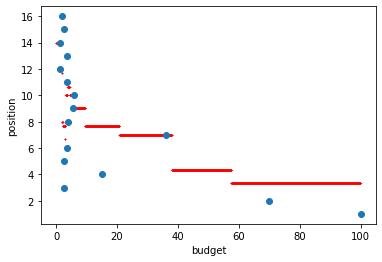

In [22]:
# A kNN regressor for the league table example
# kNN approximates a numerical function

league = pd.DataFrame({
    'club': ['Porto', 'Benfica', 'Sporting',  'Sp. Braga',  'Marítimo',  'V. Guimarães', 'Nacional', 'Gil Vicente', 'Académica', 'Rio Ave', 'P. Ferreira', 'Estoril', 'Moreirense', 'Beira-Mar', 'Olhanense', 'V. Setúbal'],
    'budget': [100, 70, 36, 15, 6, 5.5, 4, 3.6, 3.4, 3.4, 2.5, 2.5, 2.5, 1.8, 1.4, 1.2],
    'position': [1,2,7,4,10,9,8,13,11,6,3,5,15,16,14,12]
})

from sklearn.neighbors import KNeighborsRegressor as kNNR

#x=np.log(league.budget)
x=np.array(league.budget)
X=x[:,np.newaxis]
y=league.position

model=kNNR(n_neighbors=3).fit(X,y)

xpoints=np.arange(0,max(x),0.01)
Xpoints=xpoints[:,np.newaxis]

ypoints=model.predict(Xpoints)

plt.scatter(xpoints,ypoints,color='red',s=0.1)
plt.xlabel('budget')
plt.ylabel('position')
plt.scatter(x,y);